<a href="https://colab.research.google.com/github/leandrobarbieri/python-datascience-ml/blob/main/Regressao_Logistica_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logistica
Algoritmo de classificação sobrevivente ou falecido utilizando regressão logística no Python.

## Importação do dados

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Lendo os arquivos

In [143]:
# train = pd.read_csv("https://raw.githubusercontent.com/leandrobarbieri/python-datascience-ml/main/5.%20Machine%20Learning/Regress%C3%A3o%20Log%C3%ADstica/titanic_train.csv", index_col="PassengerId")
train = pd.read_csv("https://raw.githubusercontent.com/leandrobarbieri/python-datascience-ml/main/5.%20Machine%20Learning/Regress%C3%A3o%20Log%C3%ADstica/titanic_train.csv")

In [144]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Análise Exploratória

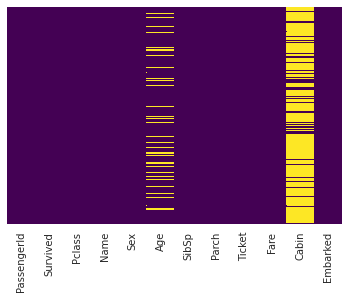

In [146]:
# uma visão das colunas com mais dados nulos
sns.heatmap(train.isnull(), yticklabels=False, cmap="viridis", cbar=False)

In [147]:
# passageiros que não sabemos onde embarcaram
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

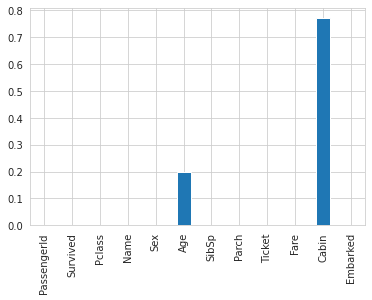

In [148]:
# Quantidade de valores vazios por coluna (%)
qtd_null = train.isnull().sum() / len(train)
qtd_null.plot.bar()
qtd_null

>Aproximadamente 20% dos dados de idade estão faltando. A proporção de idade que falta é provavelmente pequena o suficiente para que possamos fazer uma substituição razoável com alguma forma de imputação de dados. Olhando para a coluna Cabin, porém, parece que estamos perdendo muito desses dados para fazermos o mesmo. Provavelmente vamos descartar isso mais tarde ou mudá-lo para outro "Cabin Conhecido: 1 ou 0"

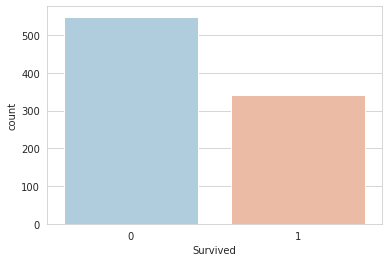

In [149]:
# analisando o alvo Survived
sns.set_style('whitegrid')
sns.countplot(x="Survived", data=train, palette='RdBu_r')

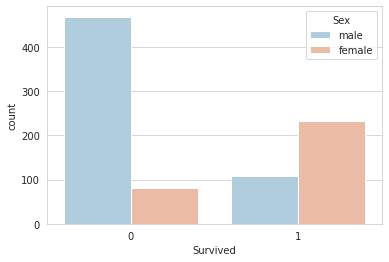

In [150]:
# Survived por Sex
sns.countplot(x="Survived", data=train, hue="Sex", palette='RdBu_r')

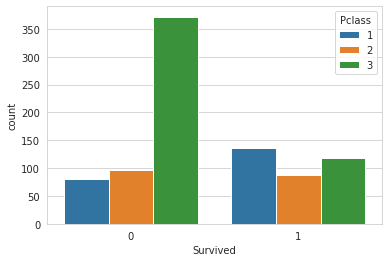

In [151]:
# Suvived por PClass
sns.countplot(x="Survived", data=train, hue="Pclass")

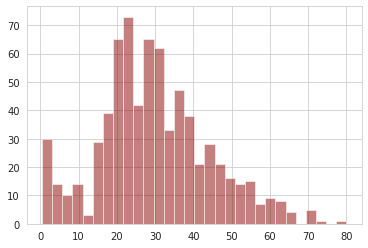

In [152]:
train["Age"].hist(bins=30, color="darkred", alpha=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


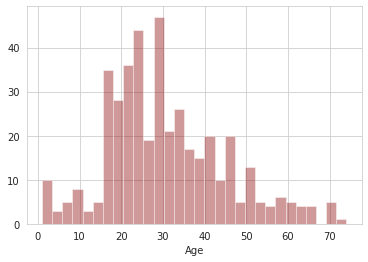

In [153]:
# somente vitimas
vitimas = train[train["Survived"] == 0]

sns.distplot(vitimas["Age"], color="darkred", bins=30, kde=False)


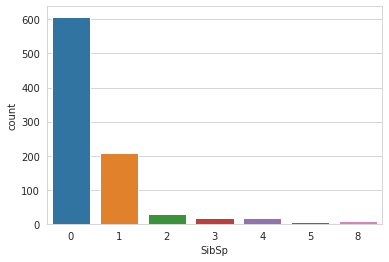

In [154]:
# quantidade de acompanhantes
sns.countplot(x='SibSp',data=train)

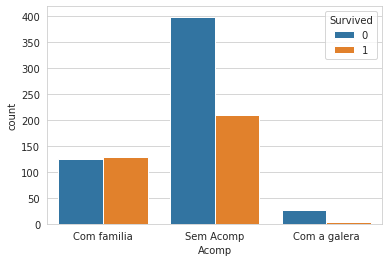

In [155]:
# vitimas por quantidade de acompanhantes
def de_para(dados): 
  if dados <=0:
    return "Sem Acomp"
  elif dados > 0 and dados < 4:
    return "Com familia"
  else:
    return "Com a galera"

# Sem acomp a maioria não survived
train["Acomp"] = train["SibSp"].map(de_para)
sns.countplot(x="Acomp", data=train, hue="Survived")

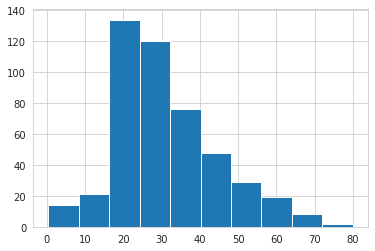

In [156]:
# idade das pessoas desacompanhadas
train[train["SibSp"] == 0]["Age"].hist()

## Limpeza dos dados

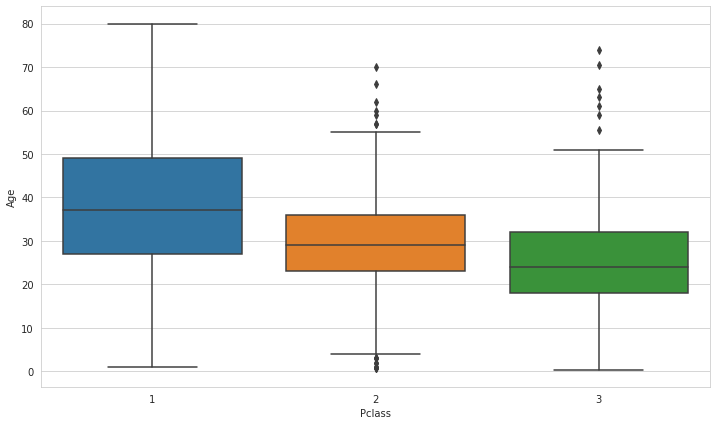

In [157]:
plt.figure(figsize=(12, 7 ))

# os mais jovens estão nas classes inferiores
sns.boxplot(x="Pclass", y="Age", data=train)

In [158]:
# preencher a idade NaN com a média de idade da Pclass
def mean_age(cols):
  age = cols[0]
  pclass = cols[1]
  if pd.isnull(age):
    if pclass == 1:
      return 37
    elif pclass == 2:
      return 29
    elif pclass == 3:
      return 24
  else:
    return age

In [159]:
# apply() is used to apply a function along an axis of the DataFrame or on values of Series.
# passa o DataFrame ou Series para a função
train["Age"] = train[["Age", "Pclass"]].apply(mean_age, axis=1)

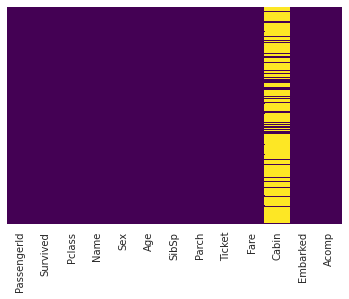

In [160]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [161]:
# deletar a coluna "Cabin" porque tem muitos valores null
train.drop(labels="Cabin", axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Acomp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Com familia
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Com familia
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Sem Acomp
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Com familia
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Sem Acomp


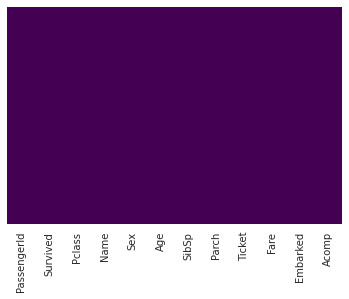

In [162]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Dados categóricos
>Precisamos converter características categóricas em variáveis dummy usando pandas! Caso contrário, nosso algoritmo de Machine Learning não será capaz de aceitar esses recursos diretamente como entradas.


In [163]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [164]:
# se for F = 1 então é M = 0 então não precisa das duas
sex = pd.get_dummies(train['Sex'], drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [165]:
# remove os campos antigos para usar os dummies
train.drop(['Sex','Embarked','Name','Ticket', 'Acomp'],axis=1,inplace=True)

# usa os dummies
train = pd.concat([train,sex,embark],axis=1)

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Modelo de Regressão Logística

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
predictions = logmodel.predict(X_test)

In [171]:
# Medição de performance do modelo
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



>Não foi tão ruim! Você pode querer explorar outros recursos no outro arquivo titanic_text.csv. Algumas sugestões:
Tente pegar o título (Dr., Sr., Sra., Etc.) do nome como parâmetro.
Talvez a cabine possa ser uma característica.
Existe alguma informação que você pode obter do bilhete?

In [176]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[134  20]
 [ 42  72]]
